In [1]:
import pandas as pd

In [2]:
from amplpy import AMPL,Environment
ampl = AMPL(Environment('/home/asino/Downloads/ampl_linux-intel64/'))
ampl.setOption("solver","/home/asino/Downloads/ampl_linux-intel64/cplex")

In [3]:
dictOfMine={"LUKAKUR":100}
dictOfPrices={}
dictOfBoughtByOthers={}
dictOfMyPlayers={}


In [4]:
ampl.read("online-auction.mod")
ampl.readData("fantasy-auction-mantra-online.dat")

	online-auction.mod
	line 39 offset 1150
	Caution: 0-dimensional slice


In [5]:
def suggestTeam():
    plas=ampl.getSet("Players").getValues()
    
    for name in plas:
        name=name[0]
        #print(name)
        dictOfBoughtByOthers[name]=0
        dictOfMyPlayers[name]=0
    print(dictOfMyPlayers["ACERBI"])
    budget=500
    for player,cost in dictOfPrices.items():
        dictOfBoughtByOthers[player]=1
    for player,cost in dictOfMine.items():
        budget-=cost
        dictOfMyPlayers[player]=1
    print(dictOfMyPlayers["ACERBI"])
        
    if dictOfBoughtByOthers:
        ampl.getParameter("alreadyBoughtByOther").setValues(dictOfBoughtByOthers)
    if dictOfMyPlayers:
        ampl.getParameter("alreadyBoughtByMe").setValues(dictOfMyPlayers)
        
        
    
    ampl.getParameter("budget").set(budget)
    ampl.solve()


In [14]:
prices=[40,50,60,70,80]

objectives=[]
for price in prices:
    dictOfMine={"ACERBI":price}
    
    suggestTeam()
    totalcost = ampl.getObjective('mp').value()
    objectives.append(totalcost)

0
1
The license for this version of CPLEX will expire in 3.8 days.
CPLEX 12.8.0.0: optimal integer solution within mipgap or absmipgap; objective 84.55672585
18852 MIP simplex iterations
0 branch-and-bound nodes
absmipgap = 0.00474006, relmipgap = 5.60577e-05
0
1
The license for this version of CPLEX will expire in 3.8 days.
CPLEX 12.8.0.0: optimal integer solution within mipgap or absmipgap; objective 83.75751532
1721 MIP simplex iterations
0 branch-and-bound nodes
absmipgap = 0.00226432, relmipgap = 2.70343e-05
0
1
The license for this version of CPLEX will expire in 3.8 days.
CPLEX 12.8.0.0: optimal integer solution within mipgap or absmipgap; objective 82.95146269
1721 MIP simplex iterations
0 branch-and-bound nodes
absmipgap = 0.0066307, relmipgap = 7.99347e-05
0
1
The license for this version of CPLEX will expire in 3.8 days.
CPLEX 12.8.0.0: optimal integer solution within mipgap or absmipgap; objective 82.15239264
19091 MIP simplex iterations
0 branch-and-bound nodes
absmipgap =

[84.55672584539637, 83.75751531908058, 82.95146268750163, 82.15239263819538, 81.35217773122416]


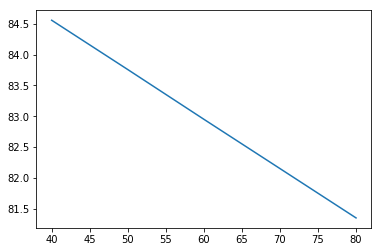

0.0


In [15]:
print(objectives)
import matplotlib.pyplot as plt
plt.plot(prices,objectives)
plt.show()
pls=ampl.getParameter("alreadyBoughtByMe").getValues().toDict()
#print(pls)
print(pls["CRISTIANORONALDO"])

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
X = np.asarray(prices).reshape((5,1))
y=objectives
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.score(X, y))

[-0.08014219]
0.9999981476635185


In [9]:
buy=ampl.getVariable("buy")
cost=ampl.getParameter("cost")
moduleChosen=ampl.getVariable("bidderChoosesModule")
solution=buy.getValues().toDict()
costs=cost.getValues().toDict()
modules=moduleChosen.getValues().toDict()

In [10]:
for moduleName,taken in modules.items():
    if taken>0.5:
        print("Module: {}\n\n".format(moduleName))
for player,val in solution.items():
    if val>0.5:
        message="{} {}".format(player,costs[player])
        print(message)

Module: m442


ADEKANYE 1.0
BALOTELLI 29.395966506624898
BARELLA 32.7672178527258
BASELLI 34.2345197782608
BERISHAE 1.0
BIRAGHI 33.9325247510813
DANILOLAR 1.0
DENSWIL 1.0
HANDANOVIC 29.389469124816397
HATEBOER 36.355050077803504
HERNANDEZT 1.0
HYSAJ 10.2981313196454
IACOPONI 33.6305297239018
LUKIC 1.0
MANDZUKIC 25.397882678618302
MOROSINI 1.0
MURILLO 1.0
RODRIGUEZR 1.0
ROSSETTINI 1.0
SALAMON 1.0
SANDRO 1.0
SPALEK 1.0
SUSO 41.958370853839796
TOLJAN 1.0
VERDI 1.61249173359262
ZAPATAC 1.0
ZMRHAL 1.0
